1. (1 punto) Implementar la clase DatosClimaticos que reciba como parámetro la ruta
del archivo CSV temperaturas.csv que contiene datos climáticos. La clase debe
cargar los datos en un DataFrame de Pandas y procesarlos para añadir las
columnas 'Mes' y 'Año'.
Atributos:
- datos: guarda los datos del csv en un DataFrame de pandas
La clase debe incluir los siguientes métodos:
- (0,3)inicializar: recibe como parámetro la ruta de un archivo CSV que
contiene datos climáticos. Carga los datos en un DataFrame de Pandas.
- (0,4)procesar_datos: procesa los datos cargados en el DataFrame,
añadiendo las columnas 'Mes' y 'Año'.
- (0,3)obtener_datos: devuelve el DataFrame con los datos climáticos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import folium
import sqlite3

class DatosClimaticos:
    def __init__(self, ruta):
        self.datos = pd.read_csv(ruta, sep=";", encoding='latin-1')
    
    def procesar_datos(self):
        self.datos['Fecha'] = pd.to_datetime(self.datos['Fecha'])
        self.datos['Mes'] = self.datos['Fecha'].dt.month
        self.datos['Año'] = self.datos['Fecha'].dt.year
        
    def obtener_datos(self):
        return self.datos

df = DatosClimaticos("temperaturas_alberto.csv")
df.procesar_datos()
df.obtener_datos()

,Ciudad,Fecha,Temperatura,Latitud,Longitud,Mes,Año
0,Londres,2021-01-01,8,51.5074,-0.1278,1,2021
1,Londres,2021-01-02,7,51.5074,-0.1278,1,2021
2,Londres,2021-01-03,6,51.5074,-0.1278,1,2021
3,Londres,2021-01-04,6,51.5074,-0.1278,1,2021
4,Londres,2021-01-05,7,51.5074,-0.1278,1,2021
...,...,...,...,...,...,...,...
5835,Atenas,2022-12-27,10,37.9838,23.7275,12,2022
5836,Atenas,2022-12-28,11,37.9838,23.7275,12,2022
5837,Atenas,2022-12-29,14,37.9838,23.7275,12,2022
5838,Atenas,2022-12-30,14,37.9838,23.7275,12,2022


2. (2 puntos) Implementar la clase AdminBaseDatos que permita conectar y
desconectar a una base de datos SQLite. La clase debe tener un método
crear_tablas_climatico que cree las tablas 'localizacion' y 'temperaturas' si no existen
en la base de datos. Además, debe tener un método insertar_datos para insertar
registros en las tablas y un método realizar_consulta para ejecutar consultas SQL y
obtener los resultados.
Atributos:
- nombre_base_de_datos: guarda una cadena de caracteres con el nombre de
la base de datos.
- conexion: guarda el estado de la conexion a la base de datos.
La clase debe incluir los siguientes métodos:
- (0,4)inicializar: recibe como parámetro el nombre de la base de datos SQLite
y guarda como atributos el nombre de la base de datos y el estado de la
conexion.
- (0,4)conectar: establece la conexión con la base de datos.
- (0,4)desconectar: cierra la conexión con la base de datos.
- (0,4)crear_tablas: crea las tablas 'localizacion' y 'temperaturas' en la base de
datos si no existen.
La tabla ‘localizacion’ debe incluir los campos Ciudad, Latitud y Longitud.
Esta tabla almacenará cada ciudad con su localización (Longitud y Latitud)
La tabla ‘temperaturas’ debe incluir los campos Ciudad, Fecha y
Temperatura.
Esta tabla almacenará la temperatura media registrada para cada ciudad y
fecha.
Una vez que cada una de estas tablas se haya creado correctamente se
debe mostrar un mensaje por pantalla indicando que han sido creadas
correctamente.-
(0,4)insertar_datos: inserta registros en la tabla especificada con los datos
proporcionados. Debe permitir insertar al menos un registro completo en la
tabla que le especifique. Si los datos son insertados en la tabla debe mostrar
un mensaje por pantalla indicando que los datos se han insertado
correctamente e indicando en que tabla se han insertado.

In [ ]:
class AdminBaseDatos:
    def __init__(self, nombre_base_datos):
        self.nombre_base_datos = nombre_base_datos
        self.conexion = None

    def conectar(self):
        self.conexion = sqlite3.connect(self.nombre_base_datos)
        print("Conexión establecida con la base de datos")


    def desconectar(self):
        self.conexion.close()
        print("Conexión cerrada con la base de datos")


    def crear_tablas(self):
        if self.conexion is None:
            print("No se ha establecido la conexión con la base de datos.")
            return

        cursor = self.conexion.cursor()


        # Crear tabla localizacion
        cursor.execute('''CREATE TABLE IF NOT EXISTS localizacion (
                            Ciudad VARCHAR(100) NOT NULL,
                            Longitud REAL NOT NULL,
                            Latitud REAL NOT NULL
                        )''')
        print("Tabla 'localizacion' creada correctamente.")


        # Crear tabla temperaturas
        cursor.execute('''CREATE TABLE IF NOT EXISTS temperaturas (
                            Ciudad VARCHAR(100) NOT NULL,
                            Fecha VARCHAR(100) NOT NULL,
                            Temperatura INTEGER NOT NULL
                        )''')
        print("Tabla 'temperaturas' creada correctamente.")

        self.conexion.commit()


    def insertar_datos(self, tabla, lista):
        if self.conexion is None:
            print("No se ha establecido la conexión con la base de datos.")
            return
        cursor = self.conexion.cursor()

        if tabla == "localizacion":
            cursor.executemany(f"INSERT INTO {tabla} VALUES (?, ?, ?)", lista)
        elif tabla == "temperaturas":
            cursor.executemany(f"INSERT INTO {tabla} VALUES (?, ?, ?)", lista)
        else:
            print(f"No se puede insertar en la tabla '{tabla}'. Tabla no válida.")
            return


        self.conexion.commit()
        print(f"¡Datos insertados en la tabla '{tabla}' correctamente!")




In [ ]:
admin_bd = AdminBaseDatos('bdtemperaturas.db')
admin_bd.conectar()
admin_bd.crear_tablas()
admin_bd.insertar_datos('localizacion', [("Londres",51.5074,-0.1278)] )
admin_bd.insertar_datos('temperaturas', [("Londres","2021-1-1",8)] )
admin_bd.desconectar()

Conexión establecida con la base de datos
Tabla 'localizacion' creada correctamente.
Tabla 'temperaturas' creada correctamente.
¡Datos insertados en la tabla 'localizacion' correctamente!
¡Datos insertados en la tabla 'temperaturas' correctamente!
Conexión cerrada con la base de datos


3. (2,2 puntos) Implementar la clase AnalizadorClimatico que reciba un objeto de la
clase DatosClimaticos y proporcione métodos para realizar diferentes análisis sobre
los datos climáticos. Los métodos deben permitir obtener la temperatura promedio
por ciudad y mes, la temperatura promedio por ciudad y año, la temperatura
promedio por ciudad, la temperatura máxima por ciudad, la temperatura mínima por
ciudad y las n ciudades más calurosas.
Atributos:
- datos: guarda un DataFrame con los datos climáticos.
La clase debe incluir los siguientes métodos:
- (0,3)inicializar: recibe un objeto de la clase DatosClimaticos y guarda los
datos climáticos para su análisis.
- (0,3)obtener_temperatura_promedio_por_ciudad_y_mes:
calcula
la
temperatura promedio por ciudad y mes y devuelve un DataFrame con los
resultados.
- (0,3)obtener_temperatura_promedio_por_ciudad_y_año:
calcula
la
temperatura promedio por ciudad y año y devuelve un DataFrame con los
resultados.
- (0,4)obtener_temperatura_promedio_por_ciudad: calcula la temperatura
promedio por ciudad y devuelve un DataFrame con los resultados. El
DataFrame debe incluir las columnas Ciudad, Latitud, Longitud y
Temperatura (media total).
- (0,3)obtener_temperatura_maxima_por_ciudad: obtiene la temperatura
máxima registrada por ciudad y devuelve un DataFrame con los resultados.
- (0,3)obtener_temperatura_minima_por_ciudad: obtiene la temperatura
mínima registrada por ciudad y devuelve un DataFrame con los resultados.
- (0,3)obtener_ciudades_mas_calurosas: obtiene las n ciudades más
calurosas y devuelve un DataFrame con los resultados.

In [ ]:

class AnalizadorClimatico:
    def __init__(self, datos_climatico):
        self.datos = datos_climatico.datos
        
    def obtener_temperatura_promedio_por_ciudad_y_mes(self):
        return self.datos.groupby(['Ciudad','Mes'])['Temperatura'].mean().reset_index()
        
    def obtener_temperatura_promedio_por_ciudad_y_año(self):
        return self.datos.groupby(['Ciudad','Año'])['Temperatura'].mean().reset_index()
        
    def obtener_temperatura_promedio_por_ciudad(self):
        return self.datos.groupby(['Ciudad','Latitud','Longitud'])['Temperatura'].mean().reset_index()
    
    def obtener_temperatura_maxima_por_ciudad(self):
        return self.datos.groupby(['Ciudad'])['Temperatura'].max().reset_index()
    
    def obtener_temperatura_minima_por_ciudad(self):
        return self.datos.groupby(['Ciudad'])['Temperatura'].min().reset_index()
    
    def obtener_ciudades_mas_calurosas(self,n):
        return self.datos.groupby('Ciudad')['Temperatura'].mean().nlargest(n).reset_index()

In [ ]:
analizador = AnalizadorClimatico(df)
analizador.obtener_temperatura_promedio_por_ciudad_y_mes()
analizador.obtener_temperatura_promedio_por_ciudad_y_año()
analizador.obtener_temperatura_promedio_por_ciudad()
analizador.obtener_temperatura_maxima_por_ciudad()
analizador.obtener_temperatura_minima_por_ciudad()
analizador.obtener_ciudades_mas_calurosas(5)


,Ciudad,Temperatura
0,Atenas,17.939726
1,Barcelona,16.527397
2,Madrid,15.901370
3,Roma,15.058904
4,Paris,11.353425


(2,2 puntos) Implementar la clase GeneradorResumenTemperaturas que reciba un objeto de la clase AnalizadorClimatico y un número entero n. La clase debe generar un archivo de texto llamado 'resumen_temperaturas.txt' que contenga un resumen del histórico de temperaturas registradas. El archivo debe incluir el promedio de temperaturas por ciudad y mes, el promedio de temperaturas por ciudad y año, el promedio de temperaturas por ciudad, la temperatura máxima registrada por ciudad, la temperatura mínima registrada por ciudad y las n ciudades más calurosas, una tabla resumen para cada uno de estos datos indicados.

	Atributos:
analizador: guarda los datos en el atributo datos del objeto AnalizadorClimático.

	La clase debe incluir los siguientes métodos:
(0,6)inicializar: recibe un objeto de la clase AnalizadorClimatico y un número entero n y guarda un DataFrame con los datos climáticos.

(1,6)generar_resumen_temperaturas: genera un archivo de texto llamado 'resumen_temperaturas.txt' que contiene un resumen del histórico de temperaturas registradas. Se debe mostrar un mensaje por pantalla indicando que el archivo se ha generado.
El archivo debe incluir el promedio de temperaturas por ciudad y mes, el promedio de temperaturas por ciudad y año, el promedio de temperaturas por ciudad, la temperatura máxima registrada por ciudad, la temperatura mínima registrada por ciudad y las n ciudades más calurosas.


In [ ]:
class GeneradorResumenTemperaturas:
    def __init__(self, analizador_climatico, n):
        self.datos = analizador_climatico
        self.n = n

    def generar_resumen_temperaturas(self):

        df = self.datos.datos

        df1 = self.datos.obtener_temperatura_promedio_por_ciudad_y_mes()

        df2 = self.datos.obtener_temperatura_promedio_por_ciudad_y_año()

        df3 = self.datos.obtener_temperatura_promedio_por_ciudad()

        df4 = self.datos.obtener_temperatura_maxima_por_ciudad()

        df5 = self.datos.obtener_temperatura_minima_por_ciudad()

        df6 = self.datos.obtener_ciudades_mas_calurosas(self.n)

        nombre_archivo = "resumen_temperaturas.txt"

        with open(nombre_archivo, 'w') as archivo:
            archivo.write("histórico de temperaturas registradas" + "\n")
            archivo.write("###########################################" + "\n")
            archivo.write("\n")
            archivo.write("Promedio temperatura por ciudad y mes \n")
            archivo.write(df1.to_string(index=False))
            archivo.write("\n")
            archivo.write("###########################################" + "\n")
            archivo.write("\n")
            archivo.write("Promedio temperatura por ciudad y año \n")
            archivo.write(df2.to_string(index=False))
            archivo.write("\n")
            archivo.write("###########################################" + "\n")
            archivo.write("\n")
            archivo.write("Promedio temperatura por ciudad \n")
            archivo.write(df3.to_string(index=False))
            archivo.write("\n")
            archivo.write("###########################################" + "\n")
            archivo.write("\n")
            archivo.write("\n")
            archivo.write("Temperatura maxima \n")
            archivo.write(df4.to_string(index=False))
            archivo.write("\n")
            archivo.write("###########################################" + "\n")
            archivo.write("\n")
            
            archivo.write("\n")
            archivo.write("Temperatura minima\n")
            archivo.write(df5.to_string(index=False))
            archivo.write("\n")
            archivo.write("###########################################" + "\n")
            archivo.write("\n")
            archivo.write("\n")
            archivo.write("Las 5 ciudades mas calurosas \n")
            archivo.write(df6.to_string(index=False))
            archivo.write("\n")
            archivo.write("###########################################" + "\n")
            archivo.write("\n")

        print(f"¡Se ha generado el archivo de histórico de temperaturas registradas!")

archivo = GeneradorResumenTemperaturas(analizador, 5)
archivo.generar_resumen_temperaturas()

¡Se ha generado el archivo de histórico de temperaturas registradas!


(2,6 puntos) Implementar la clase VisualizadorClimatico que reciba un objeto de la clase DatosClimaticos y proporcione métodos para visualizar los datos climáticos. Los métodos deben permitir graficar la temperatura promedio por mes, graficar las n ciudades más calurosas y generar un mapa climático interactivo con marcadores para cada ciudad.

Atributos:
datos_climaticos: DataFrame con los datos climáticos que guarda el atributo datos del objeto DatosClimaticos.

	La clase debe incluir los siguientes métodos:
(0,65)inicializar: recibe un objeto de la clase DatosClimaticos y guarda los datos climáticos para su posterior visualización.

(0,65)graficar_temperatura_promedio_por_mes: genera un gráfico de línea que muestra la temperatura promedio por mes. Es decir, para cada mes la temperatura media total registrada.

La gráfica debe incluir al menos los siguientes elementos:
título: ‘Temperatura Promedio por Mes’
etiqueta del eje y: ‘Temperatura (°C)’
etiqueta del eje x: ‘Mes’

(0,65)graficar_ciudades_calurosas: genera un gráfico de barras que muestra las n ciudades más calurosas. Es decir, las n ciudades que han registrado las temperaturas máximas más altas indicando cuales son esas temperaturas.
La gráfica debe incluir al menos los siguientes elementos:
título: ‘Las n ciudades más calurosas’ (n debe indicar cuantas ciudades se están mostrando)
etiqueta del eje y: ‘Temperatura (°C)’
etiqueta del eje x: ‘Ciudad’

(0,65)generar_mapa_climatico: genera un mapa climático interactivo con marcadores para cada ciudad. En el marcador debe mostrarse la temperatura media de cada ciudad.

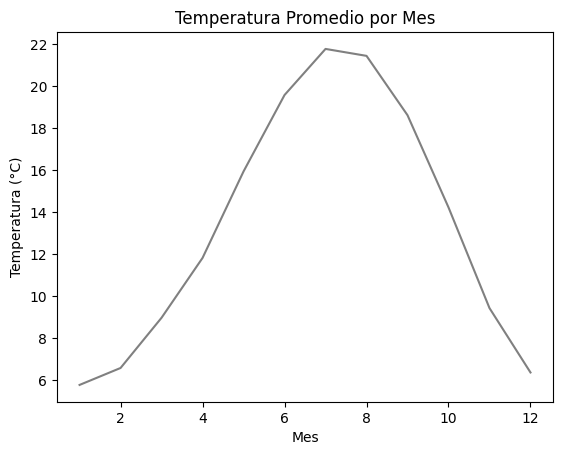

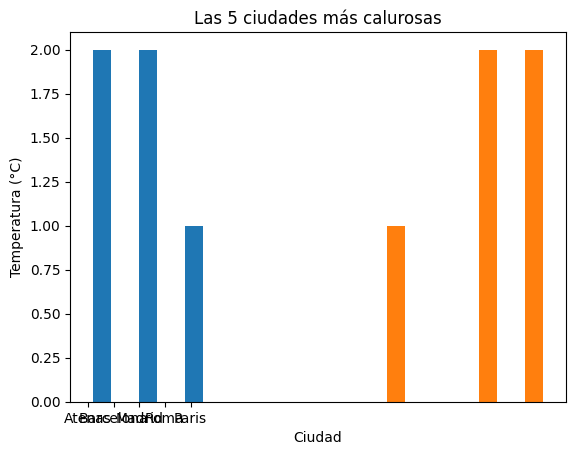

In [ ]:
class VisualizadorClimatico:
    def __init__(self,datos_climaticos):
        self.datos = datos_climaticos.obtener_datos()
    
    def graficar_temperatura_promedio_por_mes(self):
        
        datos = self.datos.groupby(["Mes"])["Temperatura"].mean().reset_index()
        plt.plot(datos.Mes,datos.Temperatura, color='GREY')
        plt.title('Temperatura Promedio por Mes')
        plt.ylabel('Temperatura (°C)')
        plt.xlabel('Mes')
        plt.show()

    def graficar_ciudades_calurosas(self,n):

        lista = self.datos.groupby('Ciudad')['Temperatura'].mean().nlargest(n).reset_index()


        plt.hist(lista)


        plt.title(f'Las {n} ciudades más calurosas')
        plt.xlabel('Ciudad')
        plt.ylabel('Temperatura (°C)')

        plt.show()
        
    def generar_mapa_climatico(self):
        pass
    
visualizador = VisualizadorClimatico(df)
visualizador.graficar_temperatura_promedio_por_mes()
visualizador.graficar_ciudades_calurosas(5)

In [ ]:
46.10025
0.16701

0.16701